# LINEARITY

In [1]:
! eups list -s | grep lsst_distrib

lsst_distrib          g4213664e8e+995cec829e 	w_2023_29 setup


In [36]:
from lsst.daf.butler import Butler
from lsst.obs.lsst import LsstCam

sensor="R03_S12"
camera = LsstCam().getCamera()
det = camera.get(sensor)

butler = Butler("/repo/ir2")
#linearizer = butler.get('linearizer', detector=det.getId(), instrument='LSSTCam', collections='u/abrought/BF/run_13144/linearity_fullcovariance_test4')
linearizer = butler.get('linearizer', detector=det.getId(), instrument='LSSTCam', collections='u/cslage/linearizer_28jan22/20220128T174703Z')
#for i, amp in enumerate(camera[0].getAmplifiers()):
import lsst.daf.butler as dB
butler = dB.Butler("/repo/ir2", collections=["u/abrought/BF/run_13144/ptcs_linearized_expapproximation_12_14_22"])
#ptc = butler.get('ptc', instrument="LSSTCam", detector=83)

R02-S00

(0.0, 400.0)

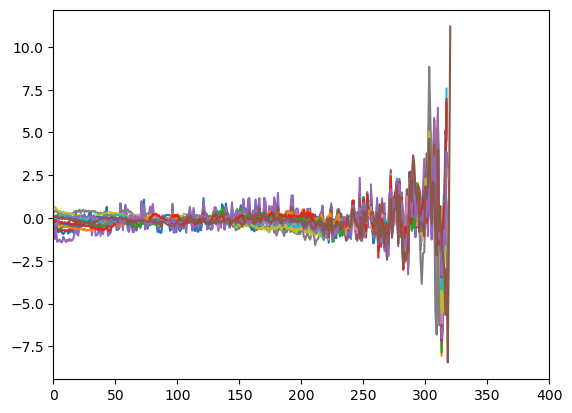

In [29]:
import matplotlib.pyplot as plt

l = linearizer.toTable()[0]#fitResiduals

for residuals in l['FIT_RES']:
    plt.plot(residuals)
    
plt.xlim(0,400)



R21-S02

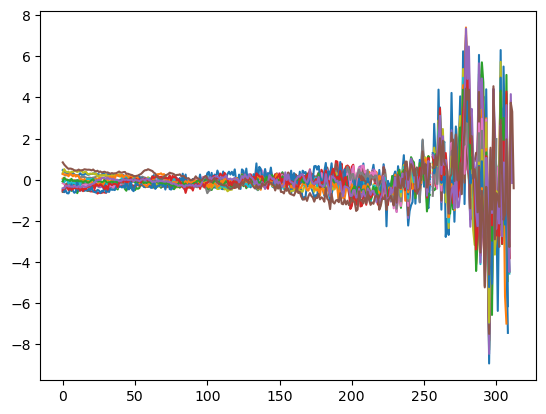

In [23]:
import matplotlib.pyplot as plt

l = linearizer.toTable()[0]#fitResiduals

for residuals in l['FIT_RES']:
    plt.plot(residuals)
    
plt.xlim(0,150000)



R24-S11

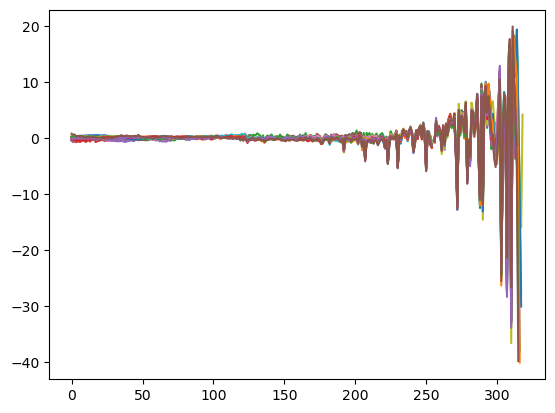

In [18]:
import matplotlib.pyplot as plt

l = linearizer.toTable()[0]#fitResiduals

for residuals in l['FIT_RES']:
    plt.plot(residuals)

plt.xlim(0,150000)

In [3]:
help(linearizer)

Help on Linearizer in module lsst.ip.isr.linearize object:

class Linearizer(lsst.ip.isr.calibType.IsrCalib)
 |  Linearizer(table=None, **kwargs)
 |  
 |  Parameter set for linearization.
 |  
 |  These parameters are included in `lsst.afw.cameraGeom.Amplifier`, but
 |  should be accessible externally to allow for testing.
 |  
 |  Parameters
 |  ----------
 |  table : `numpy.array`, optional
 |      Lookup table; a 2-dimensional array of floats:
 |  
 |      - one row for each row index (value of coef[0] in the amplifier)
 |      - one column for each image value
 |  
 |      To avoid copying the table the last index should vary fastest
 |      (numpy default "C" order)
 |  detector : `lsst.afw.cameraGeom.Detector`, optional
 |      Detector object.  Passed to self.fromDetector() on init.
 |  log : `logging.Logger`, optional
 |      Logger to handle messages.
 |  kwargs : `dict`, optional
 |      Other keyword arguments to pass to the parent init.
 |  
 |  Raises
 |  ------
 |  Runtim

R03-S12

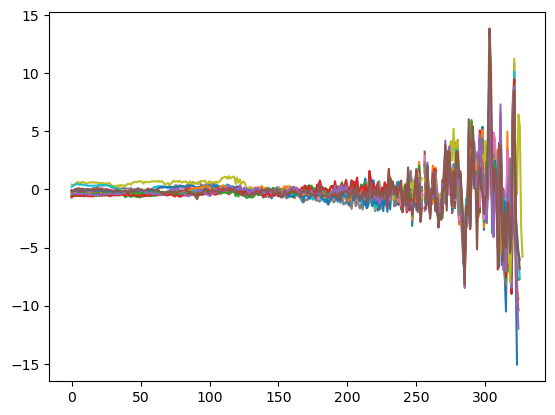

In [4]:
import matplotlib.pyplot as plt

l = linearizer.toTable()[0]#fitResiduals

for residuals in l['FIT_RES']:
    plt.plot(residuals)

plt.xlim(0,150000)

R02-S00

(0.0, 150000.0)

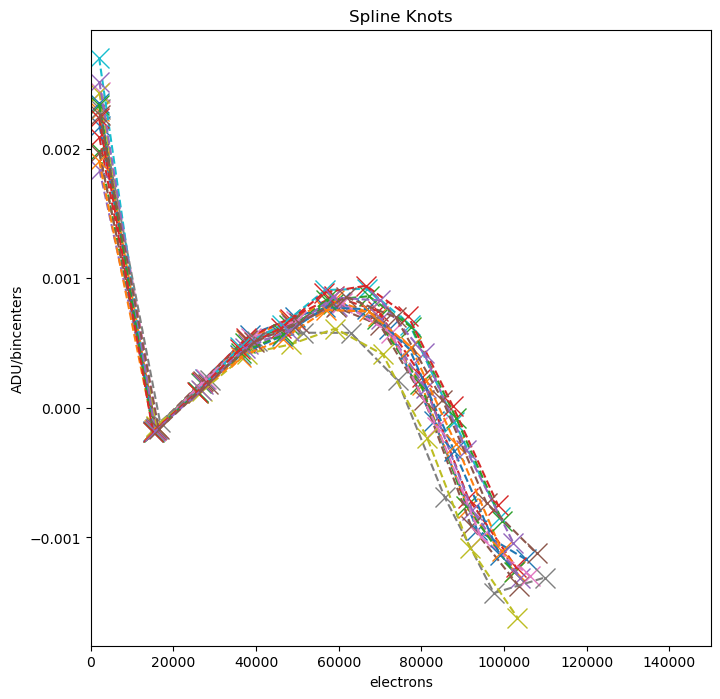

In [31]:
plt.figure(figsize=(8,8))
plt.title("Spline Knots")
import numpy as np
#plt.title("Spline knots - 13144M - Detector %d"%det)
offset = 0.0
for it, amp in enumerate(camera[0].getAmplifiers()):
    gain = ptc.gain[amp.getName()]
    centers, values = np.split(linearizer.linearityCoeffs[amp.getName()], 2)
    plt.plot(centers*gain, (values + it * offset)/centers, 'x--', markersize=15)
    plt.ylabel("ADU/bincenters")
    plt.xlabel("electrons")
    #print(amp.getName(), centers, values)
    #break
plt.xlim(0,150000)

R21-S02

(0.0, 150000.0)

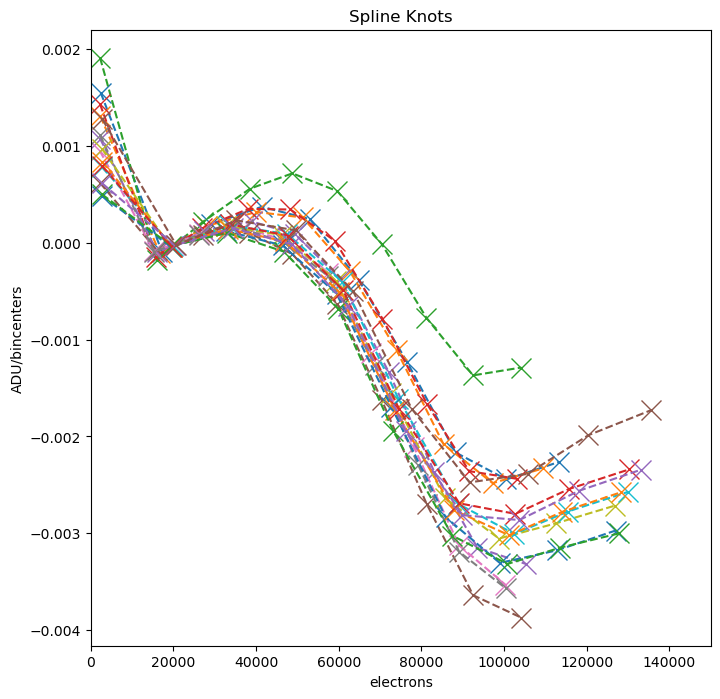

In [33]:
plt.figure(figsize=(8,8))
plt.title("Spline Knots")
import numpy as np
#plt.title("Spline knots - 13144M - Detector %d"%det)
offset = 0.0
for it, amp in enumerate(camera[0].getAmplifiers()):
    gain = ptc.gain[amp.getName()]
    centers, values = np.split(linearizer.linearityCoeffs[amp.getName()], 2)
    plt.plot(centers*gain, (values + it * offset)/centers, 'x--', markersize=15)
    plt.ylabel("ADU/bincenters")
    plt.xlabel("electrons")
    #print(amp.getName(), centers, values)
    #break
    
plt.xlim(0,150000)

R24-S11

(0.0, 150000.0)

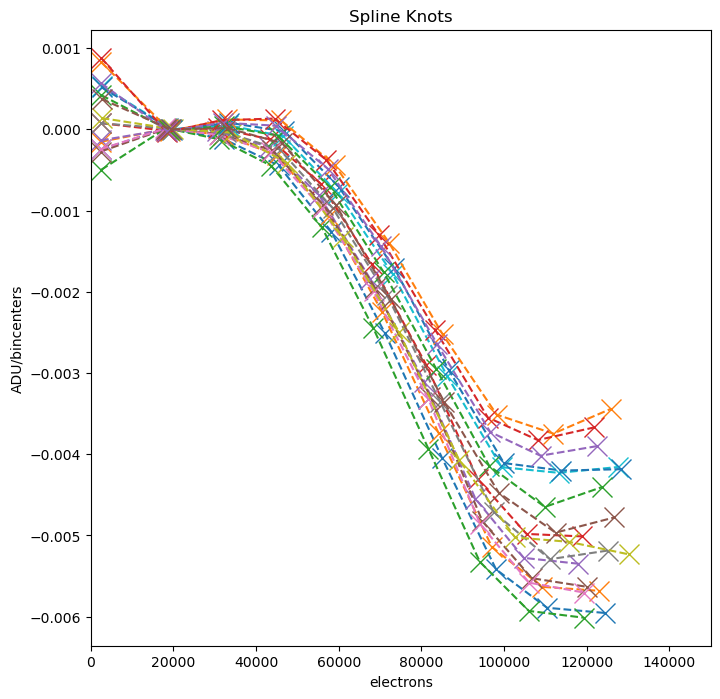

In [35]:
plt.figure(figsize=(8,8))
plt.title("Spline Knots")
import numpy as np
#plt.title("Spline knots - 13144M - Detector %d"%det)
offset = 0.0
for it, amp in enumerate(camera[0].getAmplifiers()):
    gain = ptc.gain[amp.getName()]
    centers, values = np.split(linearizer.linearityCoeffs[amp.getName()], 2)
    plt.plot(centers*gain, (values + it * offset)/centers, 'x--', markersize=15)
    plt.ylabel("ADU/bincenters")
    plt.xlabel("electrons")
    #print(amp.getName(), centers, values)
    #break
    
plt.xlim(0,150000)

R03-S12

(0.0, 150000.0)

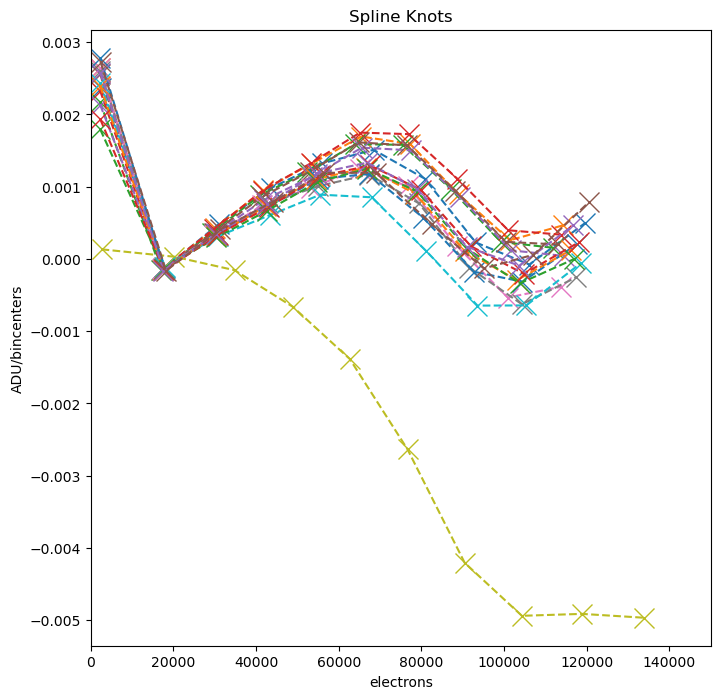

In [38]:
plt.figure(figsize=(8,8))
plt.title("Spline Knots")
import numpy as np
#plt.title("Spline knots - 13144M - Detector %d"%det)
offset = 0.0
for it, amp in enumerate(camera[0].getAmplifiers()):
    gain = ptc.gain[amp.getName()]
    centers, values = np.split(linearizer.linearityCoeffs[amp.getName()], 2)
    plt.plot(centers*gain, (values + it * offset)/centers, 'x--', markersize=15)
    plt.ylabel("ADU/bincenters")
    plt.xlabel("electrons")
    #print(amp.getName(), centers, values)
    #break
    
plt.xlim(0,150000)

(0.0, 150000.0)

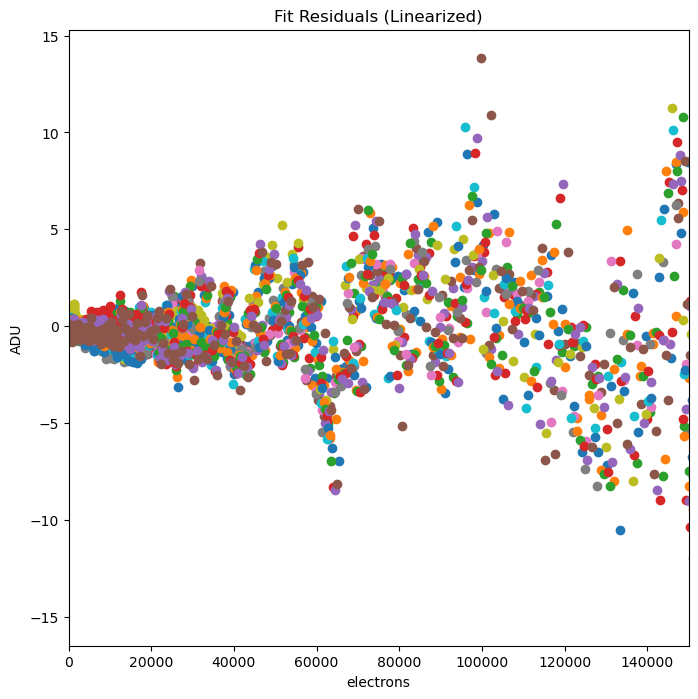

In [37]:
plt.figure(figsize=(8,8))
plt.title("Fit Residuals (Linearized)")
import numpy as np
#plt.title("Spline knots - 13144M - Detector %d"%det)
offset = 0.0
for it, amp in enumerate(camera[0].getAmplifiers()):
    gain = ptc.gain[amp.getName()]
    
    #centers, values = np.split(linearizer.linearityCoeffs[amp.getName()], 2)
    plt.scatter(np.asarray(ptc.rawMeans[amp.getName()])*gain, linearizer.fitResiduals[amp.getName()])
    plt.ylabel("ADU")
    plt.xlabel("electrons")
    
plt.xlim(0,150000)


In [25]:
butler = Butler('/repo/main', collections=["LSSTCam/raw/all","LSSTCam/calib", "u/cslage/calib/13144/calib.20220107"])
#exposure = 3021120300194
exp = butler.get('linearizer', detector=det.getId(), instrument='LSSTCam')

